<a href="https://colab.research.google.com/github/sudeep-009/PlayStoreAppReviewAnalysis/blob/dev/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**Introduction**
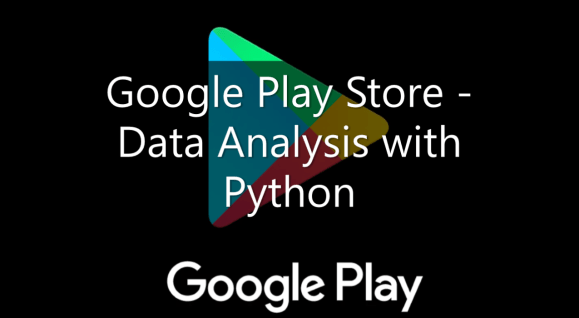






There is famous phrase which tell us that ***Data is the new oil of 21st century.***Business growth involves garnering as many customers as you can. This requires knowing exactly what customers desire and what channels they use to find products and services.In today cut-throat competation taking business decision based on gut-feel could have negative impact. Therefore utilizing the potential of value store beneath the mountain of data would be very effective.     
     In the PlayStore App data analysis we generally tried to find some of the actionalble insight that would help our app developers to develop an app that would have huge customer base based on their previous experience. Digging out the value from data which would help the app making business to grow at huge volume is the main objective of this data analysis
   

#**Exploratory Data Analysis**
Before starting we should first understand what actually Exploratory Data Analysis is ?
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.
As we have understand what EDA actually is lets start our fun journey of playing around with the dataset.

#**Lets Start Our Journey!!!**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.style.use('ggplot') #to have ggplot like style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/EDA-Capstone-Play Store App Review'
play_store_data_df = pd.read_csv(working_directory+'/Play Store Data.csv')
user_review_df = pd.read_csv(working_directory+'/User Reviews.csv')

In [ ]:
play_store_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store_data_df.shape

(10841, 13)

In [ ]:
play_store_data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store_data_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


######So we see there is one possible outlier which is having a rating of 19.0 which is probably not possible as apps are rated in scale of 0-5. So i would further inspect about this particular observation.

In [ ]:
play_store_data_df[play_store_data_df['Rating'] == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


There must be some mistake while entering the field related to this observation.As this single observation would'nt make any significant difference in my analysis so i will delete this particular observation.

In [ ]:
index_name = play_store_data_df[play_store_data_df['Rating'] == 19.0].index
play_store_data_df.drop(index_name, inplace=True) 

In [ ]:
play_store_data_df.sort_values('Installs',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1661,Temple Run 2,GAME,4.3,8118609,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
4039,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up
385,Viber Messenger,COMMUNICATION,4.3,11334973,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
3562,Google Calendar,PRODUCTIVITY,4.2,858230,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
4048,Dropbox,PRODUCTIVITY,4.4,1860844,61M,"500,000,000+",Free,0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56M,0+,Paid,$3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0+,Free,0,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
8081,CX Network,BUSINESS,NaN,0,10M,0+,Free,0,Everyone,Business,"August 6, 2018",1.3.1,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40M,0+,Paid,$399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
